In [2]:
import pandas as pd
import numpy as np

In [3]:
from selenium import webdriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities

In [4]:
from bs4 import BeautifulSoup

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
url = "https://www.google.com/flights/explore/#explore;f=CNF,PLU;t=r-United+States-0x54eab584e432360b%253A0x1c3bb99243deb742;li=7;lx=14;d=2017-05-22"
driver = webdriver.PhantomJS()
dcap = dict(DesiredCapabilities.PHANTOMJS)
dcap["phantomjs.page.settings.userAgent"] = ("Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36")
driver = webdriver.PhantomJS(desired_capabilities=dcap, service_args=['--ignore-ssl-errors=true'])
driver.implicitly_wait(20)
driver.get(url)

In [40]:
driver.save_screenshot('airfare_pricing.png')

True

In [41]:
s = BeautifulSoup(driver.page_source, 'lxml')

In [42]:
best_price_tags = s.find_all('div', 'LJTSM3-w-e')
best_prices = []
for tag in best_price_tags:
    best_prices.append(int(tag.text.replace('$', '').replace(',','')))

In [43]:
best_height_tags = s.find_all('div', 'LJTSM3-w-f')
best_heights = []
for t in best_height_tags:
    best_heights.append(float(t.attrs['style']\
                              .split('height:')[1].replace('px;', '')))

In [44]:
best_price = best_prices[0]
best_height = best_heights[0]
price_per_pixel = best_price / best_height

In [45]:
cities = s.find_all('div', 'LJTSM3-w-o')

In [46]:
bars_0 = cities[0].findAll('div', 'LJTSM3-w-x')
hlist = []
for bar in bars_0:
    hlist.append(float(bar['style'].split('height: ')[1].replace('px;', '')) * price_per_pixel)
    

In [47]:
fares = pd.DataFrame(hlist, columns=['price'])

In [48]:
fares.describe()

,price
count,60.000000
mean,795.081683
std,103.988757
min,747.000000
25%,747.000000
50%,749.501674
75%,749.501674
max,1144.726216


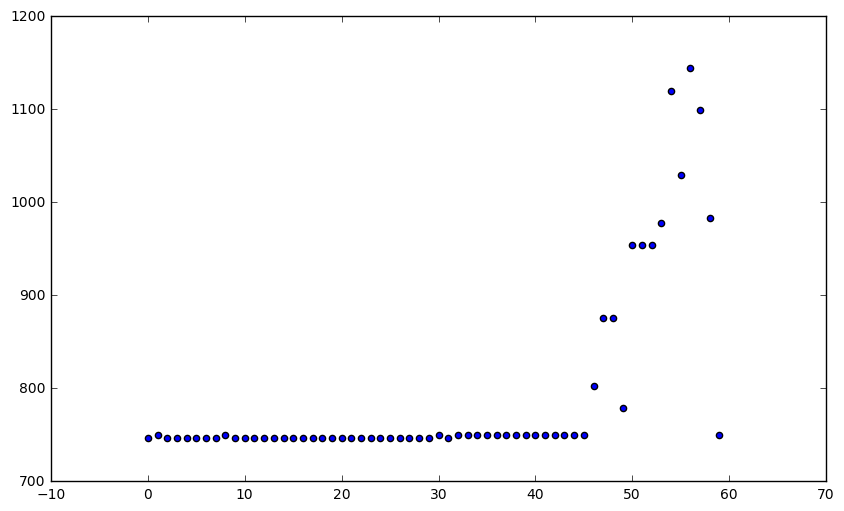

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
plt.scatter( np.arange(len(fares['price'])), fares['price']  )

In [57]:
px = [x for x in fares['price']]
ff = pd.DataFrame(px, columns=['fare']).reset_index()

In [58]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [59]:
X = StandardScaler().fit_transform(ff)
db = DBSCAN(eps=.5, min_samples=1).fit(X)

labels = db.labels_
clusters = len(set(labels))
unique_labels = set(labels)
colors = plt.cm.Spectral( np.linspace(0, 1, len(unique_labels)))

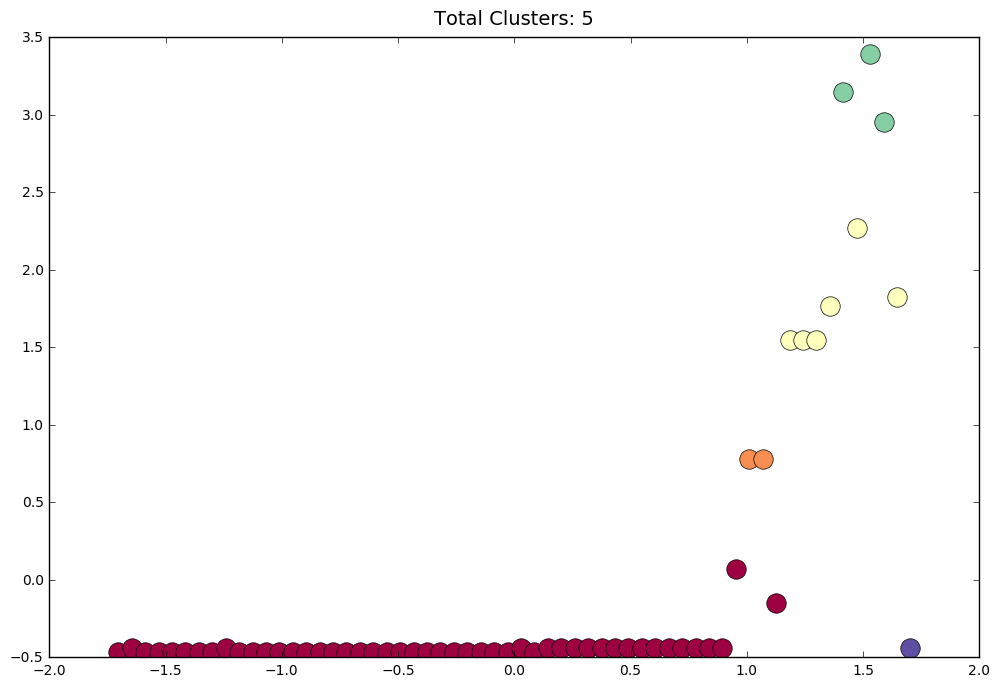

In [66]:
plt.subplots( figsize=(12,8) )
for k, c in zip(unique_labels, colors):
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    plt.plot( xy[:,0], xy[:,1], 'o', markerfacecolor=c, markeredgecolor='k', markersize=14 )

plt.title("Total Clusters: {}".format(clusters), fontsize=14, y=1.01 )